#Author: Md Mintu Miah, PhD; Post Doctoral Researcher at PATH, UC Berkeley
#Project: Contract 65A0911: Complete Cities: Bicycle Network Connectivity Evaluation Methodology
#PI: Alex Skabardonis, PhD, Professor, UC Berkeley

In [1]:
#!pip install pybna # if you need to install please remove comment out

In [1]:
# if you need to install please remove comment out
#!pip install -r requirements.txt
#!pip install SQLAlchemy
#!pip install momepy

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from collections.abc import Mapping
from distutils.version import LooseVersion
from pybna import Importer
import geopandas as gpd
import pybna

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(
C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pybna\conf.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import fiona
from shapely.ops import unary_union
import networkx as nx
import itertools
import osmnx as ox
import math
import momepy
import matplotlib.pyplot as plt
from shapely.geometry import Point
import io

In [4]:

from shapely.geometry import Polygon
import numpy as np
from shapely.geometry import Point
from functools import reduce
#import matplotlib.pyplot as plt  ## not needed
from shapely.geometry import Point, Polygon, MultiPolygon, LineString
import csv
from time import time
import time
from geopandas import GeoSeries, GeoDataFrame

In [5]:
#conda install arcpy=3.0 -c esri

In [6]:
#import arcpy
#from arcpy import env

In [5]:
%%time
# Import Configuration file
i = pybna.Importer(config="config.yaml")
# Import Study Area boundary shape file
i.import_boundary('geo_export_b69ec18e-6a40-4637-94f6-1f3aafe63144.shp', overwrite=True)
# Mention the State fips, for California it is 6
i.import_census_blocks(fips=6, overwrite=True)
i.import_census_jobs("received.neighborhood_census_block_jobs",state="CA", overwrite=True)

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pybna\importer.py:58: ResourceWarning: unclosed file <_io.TextIOWrapper name='config.yaml' mode='r' encoding='cp1252'>
  self.config = self.parse_config(yaml.safe_load(open(config)))


Connecting to database
Copying boundary to database
Loading boundary


C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Loading data from http://www2.census.gov/geo/tiger/TIGER2010BLKPOPHU/tabblock2010_06_pophu.zip
Filtering blocks to boundary
Filtering out water
Copying blocks to database
Loading data for state CA
No data for state CA for year 2020. Checking previous year.


C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pybna\importer.py:351: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jobs = jobs_main.append(jobs_aux,ignore_index=True)


Copying jobs to database
CPU times: total: 3min 7s
Wall time: 13min 19s


In [6]:
%%time
i.import_osm_network(overwrite=True)

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


Copying OSM ways to database
Copying OSM intersections to database
Processing OSM data in database
CPU times: total: 36min 37s
Wall time: 42min 35s


In [9]:
%%time
#Increase the timeout in your importer file if your computer is weak to avoid error
#i.import_osm_destinations(overwrite=True)


CPU times: total: 0 ns
Wall time: 0 ns


In [7]:
%%time
# stress
s = pybna.Stress(config='config.yaml')
s.segment_stress()
s.crossing_stress()

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pybna\stress.py:46: ResourceWarning: unclosed file <_io.TextIOWrapper name='config.yaml' mode='r' encoding='cp1252'>
  self.config = self.parse_config(yaml.safe_load(open(config)))


Connecting to database
Calculating stress on shared streets
Calculating stress on streets with bike lanes
Calculating stress on streets with cycle tracks
Calculating stress on paths
Calculating stress on shared streets
Calculating stress on streets with bike lanes
Calculating stress on streets with cycle tracks
Calculating stress on paths
  ....forward
  ....backward
CPU times: total: 516 ms
Wall time: 5min 10s


In [43]:
#%%time
# connectivity
#bna = pybna.pyBNA(config='config.yaml')
#bna.calculate_connectivity()

In [44]:
#%%time
# scores
#bna.score("myschema.my_scores_table")
#bna.aggregate("myschema.my_aggregate_score_table")

In [5]:
# Read the LTS shape file
lts=gpd.read_file("H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/neighborhood_ways.shp")
lts = lts.rename(columns={'OSMID':'osmid'})
lts=lts.rename({'INTERSECTI':'u', 'INTERSE_01':'v'}, axis='columns')
lts['length']=lts.length
lts.head()

,ROAD_ID,osmid,FUNCTIONAL,PATH_ID,ONE_WAY,u,v,WIDTH,SPEED_LIMI,FT_BIKE_IN,...,TWLTL_CROS,FT_PARK,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length
0,111276,{31439803},tertiary,None,ft,419038,419030,NaN,NaN,None,...,None,?,?,4.0,NaN,NaN,3.0,None,"LINESTRING (91536.677 -976.326, 91560.948 -973...",24.398252
1,162454,{93291777},tertiary,None,ft,364379,364375,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (108350.827 -24102.437, 108425.349 ...",75.902661
2,165633,{184388728},primary,None,ft,329656,329657,NaN,35.0,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (94730.324 -23220.754, 94768.157 -2...",37.835842
3,888344,{53726448},tertiary,None,ft,76716,76717,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (65934.473 27367.107, 65935.819 273...",1.539394
4,923150,{655711604},residential,None,ft,129104,129102,NaN,NaN,None,...,None,?,?,1.0,NaN,NaN,NaN,None,"LINESTRING (41921.847 57781.540, 41918.170 577...",3.697954


# Lets calculate the slope for each link

In [6]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt

EPSG:4269


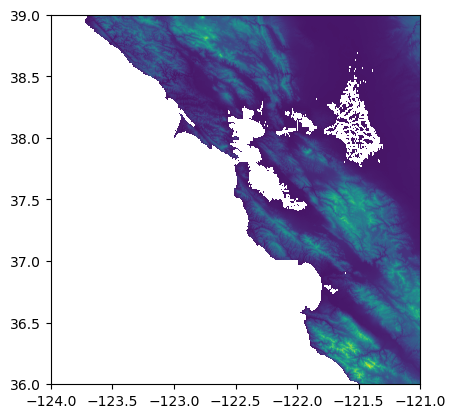

<AxesSubplot:>

In [7]:
# Open the raster image
barea_slope = rasterio.open('H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Slope/Slope/cslope11.img')
print(barea_slope.crs)
rioplot.show(barea_slope)

In [8]:
# only band is elev value (in m)
band1 = barea_slope.read(1, masked=True)  # mask noData cells [shouldn't be necessary on land]
stats = {'min': band1.min(), 'mean': band1.mean(), 'max': band1.max()}
print(stats)

{'min': -104, 'mean': -3.891794414661842, 'max': 1784}


In [9]:
# Reproject the geometries by replacing the values with projected ones
lts_new = lts.to_crs(epsg=4326)
lts_new.head(10)

,ROAD_ID,osmid,FUNCTIONAL,PATH_ID,ONE_WAY,u,v,WIDTH,SPEED_LIMI,FT_BIKE_IN,...,TWLTL_CROS,FT_PARK,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length
0,111276,{31439803},tertiary,None,ft,419038,419030,NaN,NaN,None,...,None,?,?,4.0,NaN,NaN,3.0,None,"LINESTRING (-121.95749 37.52394, -121.95722 37...",24.398252
1,162454,{93291777},tertiary,None,ft,364379,364375,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-121.76918 37.31464, -121.76834 37...",75.902661
2,165633,{184388728},primary,None,ft,329656,329657,NaN,35.0,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-121.92277 37.32337, -121.92235 37...",37.835842
3,888344,{53726448},tertiary,None,ft,76716,76717,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-122.24642 37.78016, -122.24640 37...",1.539394
4,923150,{655711604},residential,None,ft,129104,129102,NaN,NaN,None,...,None,?,?,1.0,NaN,NaN,NaN,None,"LINESTRING (-122.51925 38.05433, -122.51929 38...",3.697954
5,955824,{502817925},tertiary,None,ft,124992,124987,NaN,NaN,None,...,None,?,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-122.56019 38.01438, -122.55981 38...",35.877744
6,463165,{758004215},residential,None,ft,72994,72996,NaN,NaN,None,...,None,?,?,1.0,1.0,NaN,1.0,None,"LINESTRING (-121.95331 37.76988, -121.95271 37...",88.638366
7,513383,{792316869},secondary,None,ft,164789,165035,NaN,30.0,None,...,None,?,?,4.0,NaN,NaN,NaN,None,"LINESTRING (-122.05952 37.93424, -122.05967 37...",61.709085
8,67412,{393791123},tertiary,None,ft,295993,295988,NaN,NaN,lane,...,None,?,?,3.0,NaN,NaN,1.0,None,"LINESTRING (-121.77421 37.23356, -121.77512 37...",100.762064
9,180018,{417891815},primary,None,ft,325209,325205,NaN,NaN,lane,...,None,?,?,3.0,NaN,NaN,NaN,None,"LINESTRING (-121.90356 37.34089, -121.90344 37...",10.743065


In [10]:
# get the slope for each link of the network
%time
lts_new
# First identify the starting and ending node of each link
lts_new['starting point'] = None
lts_new['ending point'] = None

for index, row in lts_new.iterrows():
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    lts_new.at[index,'starting point'] = Point(first_coord)
    lts_new.at[index,'ending point'] = Point(last_coord)
    lts_new

CPU times: total: 0 ns
Wall time: 0 ns


In [11]:
lts_new.head(5)

,ROAD_ID,osmid,FUNCTIONAL,PATH_ID,ONE_WAY,u,v,WIDTH,SPEED_LIMI,FT_BIKE_IN,...,TF_PARK,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length,starting point,ending point
0,111276,{31439803},tertiary,None,ft,419038,419030,NaN,NaN,None,...,?,4.0,NaN,NaN,3.0,None,"LINESTRING (-121.95749 37.52394, -121.95722 37...",24.398252,POINT (-121.95749310000001 37.523941700000016),POINT (-121.9572184 37.52396300000001)
1,162454,{93291777},tertiary,None,ft,364379,364375,NaN,NaN,None,...,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-121.76918 37.31464, -121.76834 37...",75.902661,POINT (-121.7691832 37.3146411),POINT (-121.76834140000001 37.3147661)
2,165633,{184388728},primary,None,ft,329656,329657,NaN,35.0,None,...,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-121.92277 37.32337, -121.92235 37...",37.835842,POINT (-121.92277360000001 37.323369199999995),POINT (-121.9223468 37.3233632)
3,888344,{53726448},tertiary,None,ft,76716,76717,NaN,NaN,None,...,?,4.0,1.0,NaN,1.0,None,"LINESTRING (-122.24642 37.78016, -122.24640 37...",1.539394,POINT (-122.24641819999998 37.78016040000001),POINT (-122.2464029 37.78016710000001)
4,923150,{655711604},residential,None,ft,129104,129102,NaN,NaN,None,...,?,1.0,NaN,NaN,NaN,None,"LINESTRING (-122.51925 38.05433, -122.51929 38...",3.697954,POINT (-122.5192523 38.05433039999999),POINT (-122.51929420000002 38.0543339)


In [12]:
#lts_new['FUNCTIONAL'].unique()

<AxesSubplot:>

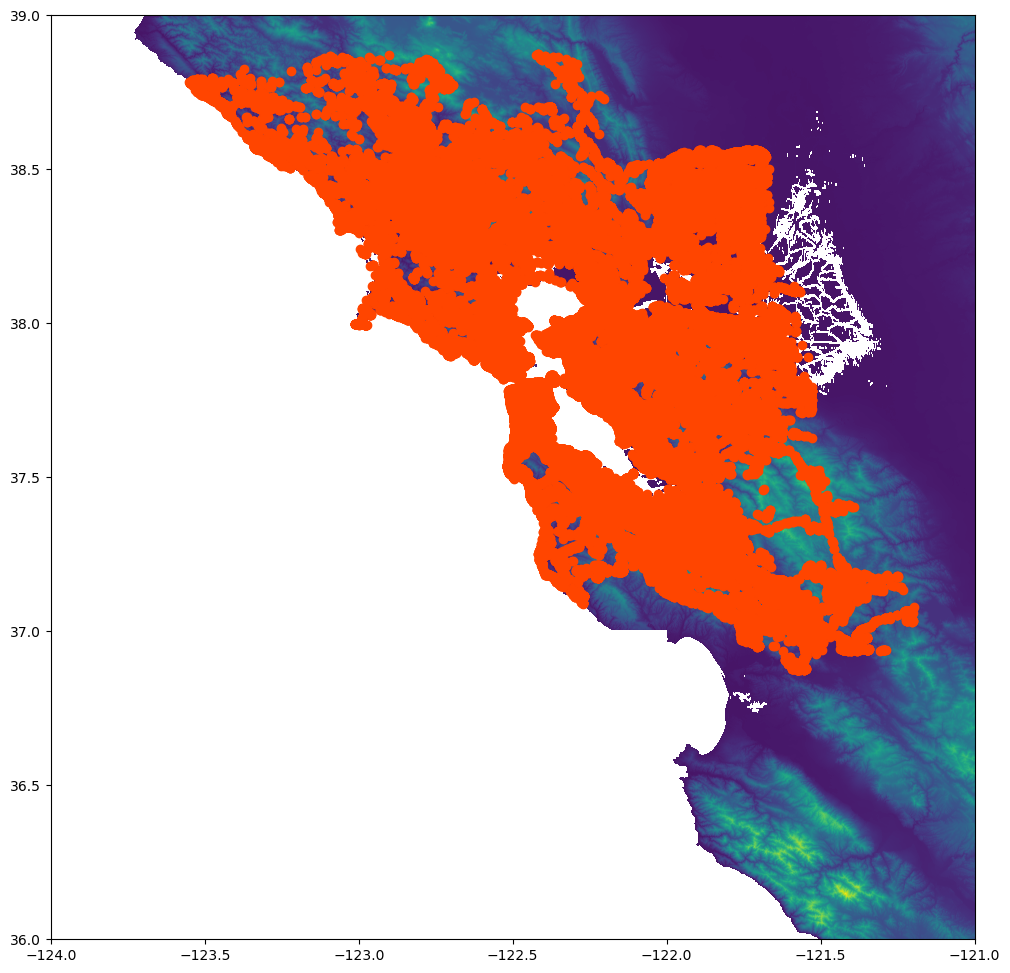

In [13]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
lts_new.boundary.plot(ax=ax, color='orangered')
show(barea_slope, ax=ax)

In [14]:
# Calculate each link starting lat and long
sf1=lts_new.loc[:,["ROAD_ID","starting point"]]
sf1.columns=["ROAD_ID","geometry"]
sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
sf2=sf1.loc[:,["ROAD_ID","geometry","start_lon","start_lat"]]
sf2.head(5)

,ROAD_ID,geometry,start_lon,start_lat
0,111276,POINT (-121.95749310000001 37.523941700000016),-121.957493,37.523942
1,162454,POINT (-121.7691832 37.3146411),-121.769183,37.314641
2,165633,POINT (-121.92277360000001 37.323369199999995),-121.922774,37.323369
3,888344,POINT (-122.24641819999998 37.78016040000001),-122.246418,37.780160
4,923150,POINT (-122.5192523 38.05433039999999),-122.519252,38.054330


In [15]:
# Calculate each link starting elevation
sf2["starting_ele"]= None
#point in test['geometry']:
x = sf2["start_lon"]
y = sf2["start_lat"]
row, col = barea_slope.index(x,y)
sf2["starting_ele"]=barea_slope.read(1)[row,col]

In [16]:
sf2.head()

,ROAD_ID,geometry,start_lon,start_lat,starting_ele
0,111276,POINT (-121.95749310000001 37.523941700000016),-121.957493,37.523942,13
1,162454,POINT (-121.7691832 37.3146411),-121.769183,37.314641,110
2,165633,POINT (-121.92277360000001 37.323369199999995),-121.922774,37.323369,36
3,888344,POINT (-122.24641819999998 37.78016040000001),-122.246418,37.780160,5
4,923150,POINT (-122.5192523 38.05433039999999),-122.519252,38.054330,11


In [17]:
%%time
# Calculate each link end point elevation
ef1=lts_new.loc[:,["ROAD_ID","ending point"]]
ef1.columns=["ROAD_ID","geometry"]
ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
ef2=ef1.loc[:,["ROAD_ID","geometry","end_lon","end_lat"]]
ef2.head(5)

CPU times: total: 9.61 s
Wall time: 9.61 s


,ROAD_ID,geometry,end_lon,end_lat
0,111276,POINT (-121.9572184 37.52396300000001),-121.957218,37.523963
1,162454,POINT (-121.76834140000001 37.3147661),-121.768341,37.314766
2,165633,POINT (-121.9223468 37.3233632),-121.922347,37.323363
3,888344,POINT (-122.2464029 37.78016710000001),-122.246403,37.780167
4,923150,POINT (-122.51929420000002 38.0543339),-122.519294,38.054334


In [18]:
%%time
# Calculate the each link end elevation
ef2["ending_ele"]= None
#point in test['geometry']:
x = ef2["end_lon"]
y = ef2["end_lat"]
row, col = barea_slope.index(x,y)
ef2["ending_ele"]=barea_slope.read(1)[row,col]

CPU times: total: 3.75 s
Wall time: 3.77 s


In [19]:
lts_new.shape,sf2.shape,ef2.shape

((505029, 29), (505029, 5), (505029, 5))

In [20]:
%%time
# Calculate the slope for each link
from functools import reduce
barea_all=[sf2,ef2,lts_new]

barea_all1= reduce(lambda  left,right: pd.merge(left,right,on=['ROAD_ID'],
                                            how='outer'), barea_all).fillna('0')
barea_all1["slope"]=abs((barea_all1['starting_ele']-barea_all1['ending_ele'])/barea_all1['length'])*100
barea_all1=barea_all1.drop_duplicates(subset=['ROAD_ID'], keep='first')
barea_all1.head()

CPU times: total: 3.7 s
Wall time: 3.73 s


,ROAD_ID,geometry_x,start_lon,start_lat,starting_ele,geometry_y,end_lon,end_lat,ending_ele,osmid,...,FT_SEG_STR,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length,starting point,ending point,slope
0,111276,POINT (-121.95749310000001 37.523941700000016),-121.957493,37.523942,13,POINT (-121.9572184 37.52396300000001),-121.957218,37.523963,13,{31439803},...,4.0,0,0,3.0,0,"LINESTRING (-121.95749 37.52394, -121.95722 37...",24.398252,POINT (-121.95749310000001 37.523941700000016),POINT (-121.9572184 37.52396300000001),0.000000
1,162454,POINT (-121.7691832 37.3146411),-121.769183,37.314641,110,POINT (-121.76834140000001 37.3147661),-121.768341,37.314766,113,{93291777},...,4.0,1.0,0,1.0,0,"LINESTRING (-121.76918 37.31464, -121.76834 37...",75.902661,POINT (-121.7691832 37.3146411),POINT (-121.76834140000001 37.3147661),3.952431
2,165633,POINT (-121.92277360000001 37.323369199999995),-121.922774,37.323369,36,POINT (-121.9223468 37.3233632),-121.922347,37.323363,36,{184388728},...,4.0,1.0,0,1.0,0,"LINESTRING (-121.92277 37.32337, -121.92235 37...",37.835842,POINT (-121.92277360000001 37.323369199999995),POINT (-121.9223468 37.3233632),0.000000
3,888344,POINT (-122.24641819999998 37.78016040000001),-122.246418,37.780160,5,POINT (-122.2464029 37.78016710000001),-122.246403,37.780167,5,{53726448},...,4.0,1.0,0,1.0,0,"LINESTRING (-122.24642 37.78016, -122.24640 37...",1.539394,POINT (-122.24641819999998 37.78016040000001),POINT (-122.2464029 37.78016710000001),0.000000
4,923150,POINT (-122.5192523 38.05433039999999),-122.519252,38.054330,11,POINT (-122.51929420000002 38.0543339),-122.519294,38.054334,11,{655711604},...,1.0,0,0,0,0,"LINESTRING (-122.51925 38.05433, -122.51929 38...",3.697954,POINT (-122.5192523 38.05433039999999),POINT (-122.51929420000002 38.0543339),0.000000


In [21]:
barea_all1.shape

(505029, 38)

In [22]:
barea_all1['slope'].describe()

count    5.050290e+05
mean     1.737539e+06
std      1.662065e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.423149e+00
max      4.825674e+10
Name: slope, dtype: float64

<AxesSubplot:>

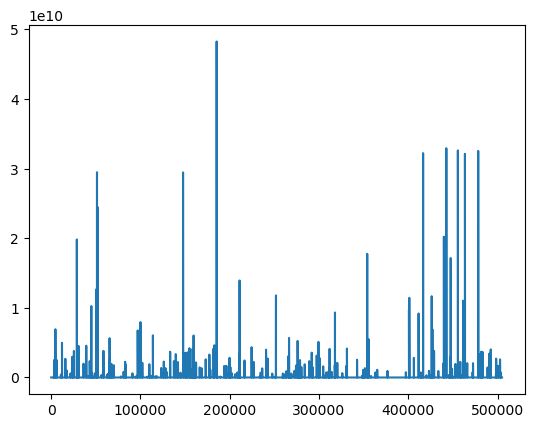

In [23]:
barea_all1.slope.plot()

In [24]:
# It seems that some of the slope is abnormal, due to mountain effect.

In [25]:
# Lets see the number of links that have slope greater than 100%
abnormal_slope=barea_all1.loc[barea_all1['slope']>100]
abnormal_slope.shape

(236, 38)

# Apply the slope effects for the LTS

In [26]:
abnormal_slope.columns

Index(['ROAD_ID', 'geometry_x', 'start_lon', 'start_lat', 'starting_ele',
       'geometry_y', 'end_lon', 'end_lat', 'ending_ele', 'osmid', 'FUNCTIONAL',
       'PATH_ID', 'ONE_WAY', 'u', 'v', 'WIDTH', 'SPEED_LIMI', 'FT_BIKE_IN',
       'FT_BIKE_01', 'TF_BIKE_IN', 'TF_BIKE_01', 'FT_LANES', 'TF_LANES',
       'FT_CROSS_L', 'TF_CROSS_L', 'TWLTL_CROS', 'FT_PARK', 'TF_PARK',
       'FT_SEG_STR', 'FT_INT_STR', 'TF_SEG_STR', 'TF_INT_STR', 'XWALK',
       'geometry', 'length', 'starting point', 'ending point', 'slope'],
      dtype='object')

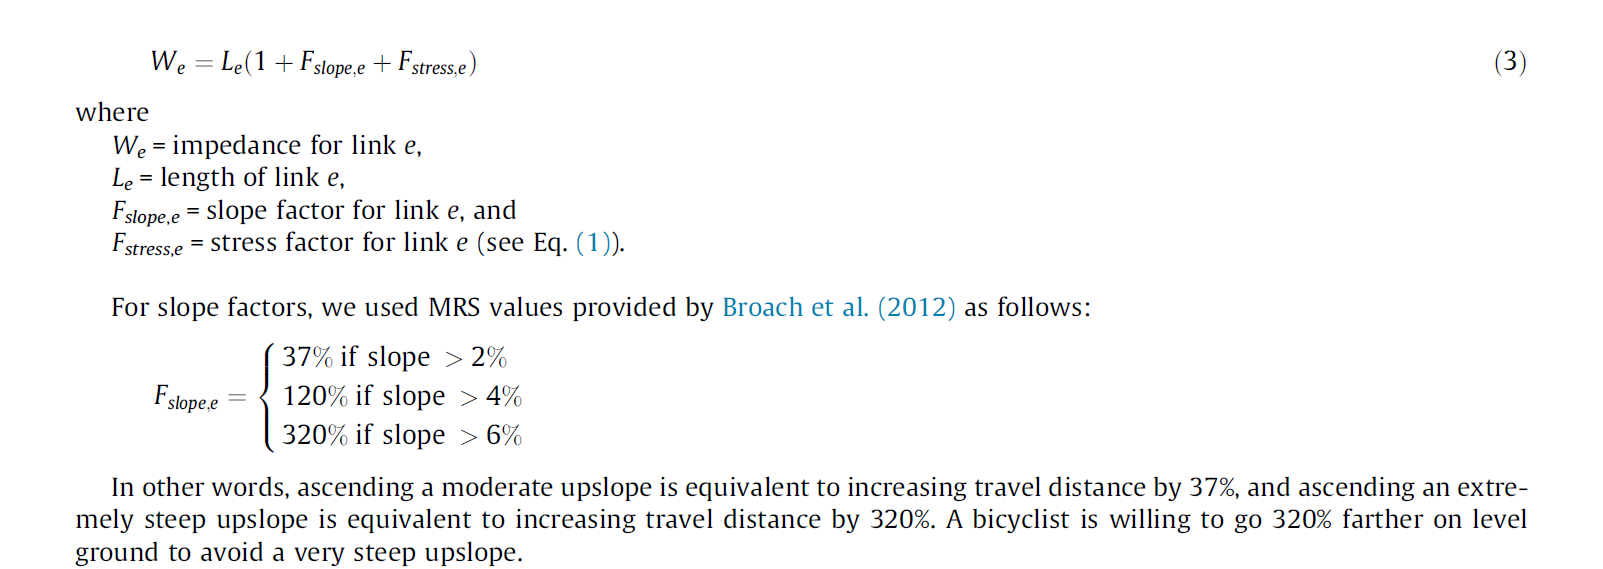

In [27]:
# write a slope impedance function
def slope_correction(length,FT_SEG_STR,slope):
    if slope <=2:
        return length*(1+FT_SEG_STR)
    elif ((slope>2) and (slope<=4)):
        return length*(1+0.37+FT_SEG_STR)
    elif ((slope>4) and (slope<=6)):
        return length*(1+1.20+FT_SEG_STR)
    else:
        return length*(1+3.20+FT_SEG_STR)

In [28]:
#barea_all1['FT_SEG_STR'].astype(str).astype(int)
barea_all1['FT_SEG_STR']=pd.to_numeric(barea_all1['FT_SEG_STR']).astype(int)
barea_all1['FT_SEG_STR'].dtypes

dtype('int32')

In [29]:
barea_all1['impedance_of_link']=barea_all1.apply(lambda row: slope_correction(row['length'],row['FT_SEG_STR'],row['slope']),axis=1)
barea_all1.head(8)

,ROAD_ID,geometry_x,start_lon,start_lat,starting_ele,geometry_y,end_lon,end_lat,ending_ele,osmid,...,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length,starting point,ending point,slope,impedance_of_link
0,111276,POINT (-121.95749310000001 37.523941700000016),-121.957493,37.523942,13,POINT (-121.9572184 37.52396300000001),-121.957218,37.523963,13,{31439803},...,0,0,3.0,0,"LINESTRING (-121.95749 37.52394, -121.95722 37...",24.398252,POINT (-121.95749310000001 37.523941700000016),POINT (-121.9572184 37.52396300000001),0.000000,121.991261
1,162454,POINT (-121.7691832 37.3146411),-121.769183,37.314641,110,POINT (-121.76834140000001 37.3147661),-121.768341,37.314766,113,{93291777},...,1.0,0,1.0,0,"LINESTRING (-121.76918 37.31464, -121.76834 37...",75.902661,POINT (-121.7691832 37.3146411),POINT (-121.76834140000001 37.3147661),3.952431,407.597287
2,165633,POINT (-121.92277360000001 37.323369199999995),-121.922774,37.323369,36,POINT (-121.9223468 37.3233632),-121.922347,37.323363,36,{184388728},...,1.0,0,1.0,0,"LINESTRING (-121.92277 37.32337, -121.92235 37...",37.835842,POINT (-121.92277360000001 37.323369199999995),POINT (-121.9223468 37.3233632),0.000000,189.179208
3,888344,POINT (-122.24641819999998 37.78016040000001),-122.246418,37.780160,5,POINT (-122.2464029 37.78016710000001),-122.246403,37.780167,5,{53726448},...,1.0,0,1.0,0,"LINESTRING (-122.24642 37.78016, -122.24640 37...",1.539394,POINT (-122.24641819999998 37.78016040000001),POINT (-122.2464029 37.78016710000001),0.000000,7.696969
4,923150,POINT (-122.5192523 38.05433039999999),-122.519252,38.054330,11,POINT (-122.51929420000002 38.0543339),-122.519294,38.054334,11,{655711604},...,0,0,0,0,"LINESTRING (-122.51925 38.05433, -122.51929 38...",3.697954,POINT (-122.5192523 38.05433039999999),POINT (-122.51929420000002 38.0543339),0.000000,7.395908
5,955824,POINT (-122.56019300000001 38.0143783),-122.560193,38.014378,17,POINT (-122.5598121 38.01426140000001),-122.559812,38.014261,17,{502817925},...,1.0,0,1.0,0,"LINESTRING (-122.56019 38.01438, -122.55981 38...",35.877744,POINT (-122.56019300000001 38.0143783),POINT (-122.5598121 38.01426140000001),0.000000,179.388721
6,463165,POINT (-121.9533115 37.769879400000015),-121.953311,37.769879,144,POINT (-121.9527144 37.76923669999999),-121.952714,37.769237,145,{758004215},...,1.0,0,1.0,0,"LINESTRING (-121.95331 37.76988, -121.95271 37...",88.638366,POINT (-121.9533115 37.769879400000015),POINT (-121.9527144 37.76923669999999),1.128180,177.276732
7,513383,POINT (-122.05951709999998 37.9342374),-122.059517,37.934237,22,POINT (-122.05967000000001 37.93478),-122.059670,37.934780,22,{792316869},...,0,0,0,0,"LINESTRING (-122.05952 37.93424, -122.05967 37...",61.709085,POINT (-122.05951709999998 37.9342374),POINT (-122.05967000000001 37.93478),0.000000,308.545424


# Lets Calculate the Connectivity for Alameda County

In [30]:
# Bring US Census track
census_track=gpd.read_file('H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Bay_Area_Census_tracts.shp')
census_track.head()

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,G0600010400100,06,001,400100,06001400100,4001,Census Tract 4001,G5020,S,6945857.0,0.0,+37.8676563,-122.2318813,14242.773440,14242.773440,6.945853e+06,"POLYGON ((-2255573.793 353162.591, -2255577.88..."
1,G0600010400200,06,001,400200,06001400200,4002,Census Tract 4002,G5020,S,586560.0,0.0,+37.8481378,-122.2495916,3990.700032,3990.700032,5.865583e+05,"POLYGON ((-2258184.246 353217.527, -2258186.81..."
2,G0600010400300,06,001,400300,06001400300,4003,Census Tract 4003,G5020,S,1110840.0,0.0,+37.8405841,-122.2544782,5311.191050,5311.191050,1.110836e+06,"POLYGON ((-2259381.804 351835.858, -2259385.23..."
3,G0600010400400,06,001,400400,06001400400,4004,Census Tract 4004,G5020,S,716138.0,0.0,+37.8482840,-122.2574447,3812.082499,3812.082499,7.161367e+05,"POLYGON ((-2259084.126 353696.375, -2259085.36..."
4,G0600010400500,06,001,400500,06001400500,4005,Census Tract 4005,G5020,S,591424.0,0.0,+37.8485452,-122.2647353,3292.829056,3292.829056,5.914232e+05,"POLYGON ((-2259833.634 353763.276, -2259822.21..."


<AxesSubplot:>

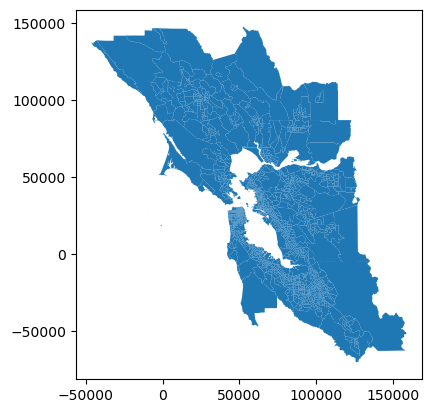

In [31]:
census_track1=census_track.to_crs(epsg=7131)
census_track1.plot()

In [32]:
# read the alamedo boundary shape file
study_bd=gpd.read_file("H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/geo_export_b69ec18e-6a40-4637-94f6-1f3aafe63144.shp")
study_bd

,county,fipsstco,objectid,geometry
0,Alameda,06001,1.0,"MULTIPOLYGON (((-122.21496 37.76113, -122.2156..."
1,Contra Costa,06013,2.0,"MULTIPOLYGON (((-121.95091 38.05392, -121.9505..."
2,Marin,06041,3.0,"MULTIPOLYGON (((-122.86959 38.02140, -122.8711..."
3,Napa,06055,4.0,"POLYGON ((-122.20246 38.68898, -122.20232 38.6..."
4,San Francisco,06075,5.0,"MULTIPOLYGON (((-122.47738 37.81103, -122.4763..."
5,San Mateo,06081,6.0,"MULTIPOLYGON (((-122.50248 37.70813, -122.4977..."
6,Santa Clara,06085,7.0,"MULTIPOLYGON (((-122.02427 37.46094, -122.0203..."
7,Solano,06095,8.0,"MULTIPOLYGON (((-122.01053 38.09290, -122.0110..."
8,Sonoma,06097,9.0,"MULTIPOLYGON (((-123.53354 38.76841, -123.5333..."


In [33]:
# lets consider only Alameda for now
sf_bd=study_bd.loc[study_bd['county']=='San Mateo']
sf_bd1=gpd.GeoDataFrame.explode(sf_bd)
sf_bd1

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\723248243.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_bd1=gpd.GeoDataFrame.explode(sf_bd)


county fipsstco  objectid  \
5 0  San Mateo    06081       6.0   
  1  San Mateo    06081       6.0   
  2  San Mateo    06081       6.0   

                                              geometry  
5 0  POLYGON ((-122.50248 37.70813, -122.49778 37.7...  
  1  POLYGON ((-122.26608 37.54403, -122.26568 37.5...  
  2  POLYGON ((-122.33513 37.10750, -122.33548 37.1...

In [34]:
sf_bd1.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

<AxesSubplot:>

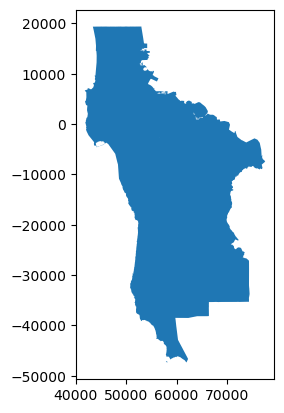

In [35]:
sf_bd_proj = sf_bd.to_crs(epsg=7131)
sf_bd_proj.plot()

In [36]:
sf_bd_proj

,county,fipsstco,objectid,geometry
5,San Mateo,06081,6.0,"MULTIPOLYGON (((43371.958 19354.278, 43786.493..."


In [37]:
sf_bd_proj['area']=sf_bd_proj['geometry'].area*3.861e-7 # mile square
sf_bd_proj

,county,fipsstco,objectid,geometry,area
5,San Mateo,06081,6.0,"MULTIPOLYGON (((43371.958 19354.278, 43786.493...",455.824753


In [38]:
sf_area=sf_bd_proj[['area']].values
sf_area

array([[455.82475276]])

In [39]:
# Convert to geodataframe
#abnormal_slope1=abnormal_slope.set_crs(epsg=4326)
#abnormal_slope2=abnormal_slope1.to_crs(epsg=7131)
barea_all2 = gpd.GeoDataFrame(barea_all1, crs="EPSG:4326", geometry='geometry')
barea_all3=barea_all2.to_crs(epsg=7131)
barea_all3.head()

,ROAD_ID,geometry_x,start_lon,start_lat,starting_ele,geometry_y,end_lon,end_lat,ending_ele,osmid,...,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length,starting point,ending point,slope,impedance_of_link
0,111276,POINT (-121.95749310000001 37.523941700000016),-121.957493,37.523942,13,POINT (-121.9572184 37.52396300000001),-121.957218,37.523963,13,{31439803},...,0,0,3.0,0,"LINESTRING (91536.677 -976.326, 91560.948 -973...",24.398252,POINT (-121.95749310000001 37.523941700000016),POINT (-121.9572184 37.52396300000001),0.000000,121.991261
1,162454,POINT (-121.7691832 37.3146411),-121.769183,37.314641,110,POINT (-121.76834140000001 37.3147661),-121.768341,37.314766,113,{93291777},...,1.0,0,1.0,0,"LINESTRING (108350.827 -24102.437, 108425.349 ...",75.902661,POINT (-121.7691832 37.3146411),POINT (-121.76834140000001 37.3147661),3.952431,407.597287
2,165633,POINT (-121.92277360000001 37.323369199999995),-121.922774,37.323369,36,POINT (-121.9223468 37.3233632),-121.922347,37.323363,36,{184388728},...,1.0,0,1.0,0,"LINESTRING (94730.324 -23220.754, 94768.157 -2...",37.835842,POINT (-121.92277360000001 37.323369199999995),POINT (-121.9223468 37.3233632),0.000000,189.179208
3,888344,POINT (-122.24641819999998 37.78016040000001),-122.246418,37.780160,5,POINT (-122.2464029 37.78016710000001),-122.246403,37.780167,5,{53726448},...,1.0,0,1.0,0,"LINESTRING (65934.473 27367.107, 65935.819 273...",1.539394,POINT (-122.24641819999998 37.78016040000001),POINT (-122.2464029 37.78016710000001),0.000000,7.696969
4,923150,POINT (-122.5192523 38.05433039999999),-122.519252,38.054330,11,POINT (-122.51929420000002 38.0543339),-122.519294,38.054334,11,{655711604},...,0,0,0,0,"LINESTRING (41921.847 57781.540, 41918.170 577...",3.697954,POINT (-122.5192523 38.05433039999999),POINT (-122.51929420000002 38.0543339),0.000000,7.395908


In [40]:
# Now lets crop the alameda area of lTS network
sf_lts=gpd.clip(barea_all3,sf_bd_proj)
sf_lts.head()

,ROAD_ID,geometry_x,start_lon,start_lat,starting_ele,geometry_y,end_lon,end_lat,ending_ele,osmid,...,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length,starting point,ending point,slope,impedance_of_link
475308,667525,POINT (-122.15319749999999 37.2159705),-122.153197,37.215970,428,POINT (-122.155672 37.2133736),-122.155672,37.213374,399,"{264538577,8931558}",...,0,4.0,0,0,"LINESTRING (74344.195 -35229.327, 74315.192 -3...",423.581188,POINT (-122.15319749999999 37.2159705),POINT (-122.155672 37.2133736),6.846385,3473.365741
420161,666757,POINT (-122.15319749999999 37.2159705),-122.153197,37.215970,428,POINT (-122.15255249999998 37.2183748),-122.152552,37.218375,442,"{10555339,8931558}",...,0,4.0,0,0,"LINESTRING (74344.195 -35229.327, 74351.734 -3...",316.020319,POINT (-122.15319749999999 37.2159705),POINT (-122.15255249999998 37.2183748),4.430095,1959.325978
454709,666925,POINT (-122.1532808 37.272077700000004),-122.153281,37.272078,763,POINT (-122.15472670000001 37.2737293),-122.154727,37.273729,766,{38903767},...,0,1.0,0,0,"LINESTRING (74317.284 -29002.382, 74314.670 -2...",293.547280,POINT (-122.1532808 37.272077700000004),POINT (-122.15472670000001 37.2737293),1.021982,587.094561
114471,666753,POINT (-122.15255249999998 37.2183748),-122.152552,37.218375,442,POINT (-122.14545570000001 37.2351925),-122.145456,37.235192,574,"{10555336,10555339,8931556}",...,1.0,4.0,0,0,"LINESTRING (74371.412 -34780.389, 74369.039 -3...",2811.802766,POINT (-122.15255249999998 37.2183748),POINT (-122.14545570000001 37.2351925),4.694497,17433.177151
334099,95999,POINT (-122.15041789999998 37.2402624),-122.150418,37.240262,600,POINT (-122.1450202 37.24523370000001),-122.145020,37.245234,724,"{10555336,8931560,10555338,8931563,10555342}",...,0,4.0,1.0,0,"MULTILINESTRING ((74411.032 -32455.373, 74407....",2377.091823,POINT (-122.15041789999998 37.2402624),POINT (-122.1450202 37.24523370000001),5.216458,14737.969300


In [41]:
sf_lts.groupby(['FT_BIKE_IN']).count()

,ROAD_ID,geometry_x,start_lon,start_lat,starting_ele,geometry_y,end_lon,end_lat,ending_ele,osmid,...,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length,starting point,ending point,slope,impedance_of_link
FT_BIKE_IN,,,,,,,,,,,,,,,,,,,,,
0,38404,38404,38404,38404,38404,38404,38404,38404,38404,38404,...,38404,38404,38404,38404,38404,38404,38404,38404,38404,38404
lane,3616,3616,3616,3616,3616,3616,3616,3616,3616,3616,...,3616,3616,3616,3616,3616,3616,3616,3616,3616,3616
path,4075,4075,4075,4075,4075,4075,4075,4075,4075,4075,...,4075,4075,4075,4075,4075,4075,4075,4075,4075,4075
sharrow,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,...,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329
track,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [42]:
sf_lts.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [43]:
lts.shape

(505029, 27)

In [44]:
# Convert the LTS shape file to graph to run the 
sf_lts_g=gpd.GeoDataFrame.explode(sf_lts)
sf_lts_g1 =momepy.gdf_to_nx(sf_lts_g, approach='primal')

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\1286791951.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_g=gpd.GeoDataFrame.explode(sf_lts)


In [45]:
#  f, ax = plt.subplots(1, 3, figsize=(18, 10), sharex=True, sharey=True)
#  sf_lts.plot(color='#e32e00', ax=ax[0])
#  for i, facet in enumerate(ax):
#      facet.set_title(("Streets", "Primal graph", "Overlay")[i])
#      facet.axis("off")
#  nx.draw(sf_lts_g1, {n:[n[0], n[1]] for n in list(sf_lts_g1.nodes)}, ax=ax[1], node_size=0.01)
# # sf_lts.plot(color='#e32e00', ax=ax[2], zorder=-1)
#  nx.draw(sf_lts_g1, {n:[n[0], n[1]] for n in list(sf_lts_g1.nodes)}, ax=ax[2], node_size=0.01)

# Calculate Simple Graph Theories Connectivity for SF

<AxesSubplot:>

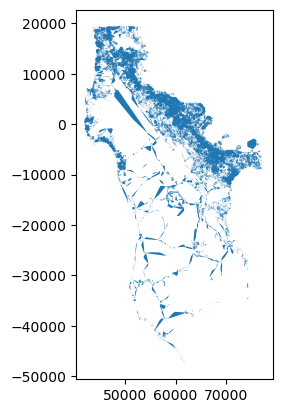

In [46]:
sf_lts['geometry'].convex_hull.plot()

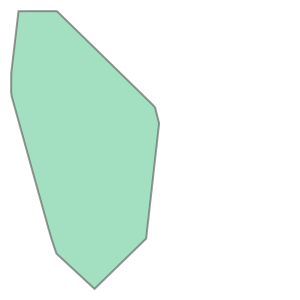

In [47]:
# Get the Convex Hull of the network
convex_hull_area = sf_lts.unary_union.convex_hull
# Show output
convex_hull_area

<AxesSubplot:>

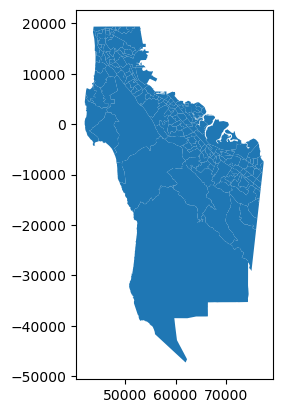

In [48]:
census_track2_sf=gpd.clip(census_track1,convex_hull_area)
census_track2_sf.plot()

In [49]:
convex_hull_area1=convex_hull_area.area
convex_hull_area1

1568396662.4715343

In [50]:
# Calculate the number of Intersections
crossroad_nodes = [node for node in sf_lts_g1.nodes() if len(sf_lts_g1.edges(node)) > 2]


In [51]:
def get_number_of_elements(list):
    count = 0
    for element in list:
        count += 1
    return count

#print("Number of elements in the list: ", get_number_of_elements(list_c))

In [52]:
# Number of intersections where edge>2
NI=get_number_of_elements(crossroad_nodes)
NI

16265

# Calculate the Connectivity of the SF Network: using Formula "Shortest Path in bicycle facilities /Shortest Path in motor ways

In [53]:
sf_lts['FT_BIKE_IN'].dtypes

dtype('O')

<AxesSubplot:>

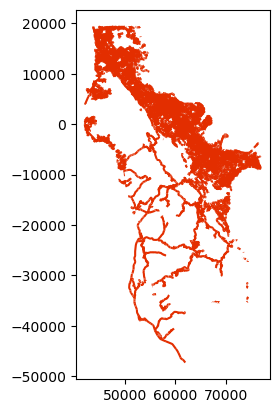

In [54]:
# Get the motorway network and bike network based on functional class of the roads
#sf_motor_network=sf_lts[sf_lts['BIKE_LANE_'].isna()]
sf_motor_network=sf_lts.loc[sf_lts['FT_BIKE_IN']=='0']
# Plot the motor Network
sf_motor_network.plot(color='#e32e00')

<AxesSubplot:>

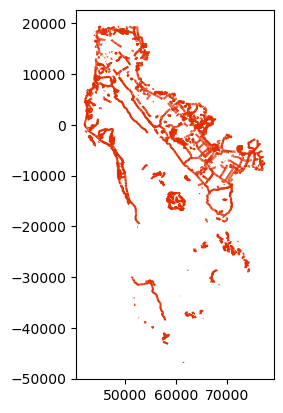

In [55]:
# Plot the Bike Network
sf_bike_network=sf_lts.loc[sf_lts['FT_BIKE_IN']!='0']
sf_bike_network.plot(color='#e32e00')

In [56]:
sf_lts.shape, sf_bike_network.shape, sf_motor_network.shape

((47425, 39), (9021, 39), (38404, 39))

In [57]:
sf_bike_network.tail()

,ROAD_ID,geometry_x,start_lon,start_lat,starting_ele,geometry_y,end_lon,end_lat,ending_ele,osmid,...,FT_INT_STR,TF_SEG_STR,TF_INT_STR,XWALK,geometry,length,starting point,ending point,slope,impedance_of_link
267901,698787,POINT (-122.35341939999999 37.5919373),-122.353419,37.591937,4,POINT (-122.35342450000002 37.5920465),-122.353425,37.592047,4,"{23652544,984801365}",...,1.0,1.0,3.0,0,"LINESTRING (56529.761 6460.843, 56529.507 6467...",12.128443,POINT (-122.35341939999999 37.5919373),POINT (-122.35342450000002 37.5920465),0.0,24.256886
68748,698788,POINT (-122.35151219999999 37.5919946),-122.351512,37.591995,4,POINT (-122.35342450000002 37.5920465),-122.353425,37.592047,4,{23652614},...,1.0,1.0,0,0,"LINESTRING (56698.194 6467.377, 56690.613 6470...",169.771346,POINT (-122.35151219999999 37.5919946),POINT (-122.35342450000002 37.5920465),0.0,339.542692
345680,698789,POINT (-122.35735580000001 37.5921434),-122.357356,37.592143,4,POINT (-122.35342450000002 37.5920465),-122.353425,37.592047,4,{23652614},...,1.0,1.0,1.0,0,"LINESTRING (56182.086 6483.367, 56198.619 6483...",350.040115,POINT (-122.35735580000001 37.5921434),POINT (-122.35342450000002 37.5920465),0.0,700.080229
138118,704977,POINT (-122.3459358 37.5920149),-122.345936,37.592015,4,POINT (-122.34567790000001 37.5920173),-122.345678,37.592017,4,{32080724},...,1.0,1.0,0,0,"LINESTRING (57190.685 6470.161, 57213.462 6470...",22.778649,POINT (-122.3459358 37.5920149),POINT (-122.34567790000001 37.5920173),0.0,45.557298
242102,704976,POINT (-122.3455241 37.592019300000004),-122.345524,37.592019,4,POINT (-122.34567790000001 37.5920173),-122.345678,37.592017,4,{32080724},...,1.0,1.0,1.0,0,"LINESTRING (57227.045 6470.690, 57213.462 6470...",13.585050,POINT (-122.3455241 37.592019300000004),POINT (-122.34567790000001 37.5920173),0.0,27.170100


In [58]:
def sf_connectivity_score (sf_motor_network,sf_bike_network):
    connectivity_score=[]
    sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
    sf_lts_motor_g1 =momepy.gdf_to_nx(sf_lts_motor_g, approach='primal')
    #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
    motor_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_motor_g1,cutoff=None, weight='impedance_of_link'))
    # Convert the shorsted path distance distionary to dataframe
    sf_shortest_path_motor_length=pd.DataFrame.from_dict(motor_length)
    # Calculate the total motor path
    sf_shortest_path_motor_length['total']=sf_shortest_path_motor_length.sum(numeric_only=True, axis=0)
    sf_shortest_path_motor_length_sum=sf_shortest_path_motor_length['total'].sum()


    sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)
    sf_lts_bike_g1 =momepy.gdf_to_nx(sf_lts_bike_g, approach='primal')
    #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
    bike_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_bike_g1,cutoff=None, weight='impedance_of_link'))
    # Convert the shorsted path distance distionary to dataframe
    sf_shortest_path_bike_length=pd.DataFrame.from_dict(bike_length)
    # Calculate the total motor path
    sf_shortest_path_bike_length['total']=sf_shortest_path_bike_length.sum(numeric_only=True, axis=0)
    sf_shortest_path_bike_length_sum=sf_shortest_path_bike_length['total'].sum()

    #connectivity score
    sf_network_connectivity_score=sf_shortest_path_bike_length_sum/sf_shortest_path_motor_length_sum
    connectivity_score.append((sf_shortest_path_motor_length_sum,sf_shortest_path_bike_length_sum, sf_network_connectivity_score))

    cols=['motor_path_weighted_length','bike_path_weighted_length','Connectivity score']
    result = pd.DataFrame(connectivity_score, columns=cols)
    return result


In [59]:
def graph_parameter(sf_motor_network,cul_de_sacs,convex_hull_area1,sf_area):
    connectivity_score=[]
    sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
    sf_lts_motor_g1 =momepy.gdf_to_nx(sf_lts_motor_g, approach='primal')
    # Calculate the number of Intersections
    crossroad_nodes = [node for node in sf_lts_motor_g1.nodes() if len(sf_lts_motor_g1.edges(node)) > 2]
    # Number of intersections where edge>2
    NI=get_number_of_elements(crossroad_nodes)
    # Calculate the parameters that we need
    edge_length_total1=sf_lts_motor_g.geometry.length.sum()
    street_segment_count1=sf_lts_motor_g1.number_of_edges()
    n1=sf_lts_motor_g1.number_of_nodes()
    sn=nx.number_connected_components(sf_lts_motor_g1)
#    cul_de_sacs=1102 # used cul-de-scas function from ArcGIS Pro
    
    Street_density=(edge_length_total1*0.000621371)/(convex_hull_area1*3.861e-7) # mile/square mile
    Intersection_density=(NI/convex_hull_area1*3.861e-7) # per mile square
    Street_density_by_land_area=(edge_length_total1*0.000621371)/(sf_area) # mile/square mile
    Intersection_density_by_land_area=(NI/sf_area) # per mile square
    CNR=(NI/(NI+cul_de_sacs))
    alpha=(street_segment_count1-n1+sn)/(2*n1-5)
    beta=street_segment_count1/n1
    gamma=street_segment_count1/(3*n1-2)
    eta=edge_length_total1/street_segment_count1
    GTP=(street_segment_count1-n1+sn)/((math.sqrt(n1)-1)**2)
    Cyclomatic_Number=street_segment_count1-n1+1
    Aggregate_TP_score=alpha+beta+gamma+Cyclomatic_Number
    
    connectivity_score.append((NI,street_segment_count1,n1,sn,Street_density,Intersection_density,Street_density_by_land_area,Intersection_density_by_land_area,CNR,alpha,beta,gamma,eta,GTP,Cyclomatic_Number,Aggregate_TP_score))
    cols=['Number of Intersection','street_segment_count','Number of Node','Number of subnetwork','Street_density','Intersection_density','Street_density_by_land_area','Intersection_density_by_land_area','CNR','alpha','beta','gamma','eta','GTP','cyclomatic_Number','Aggregate_TP_score']
    result = pd.DataFrame(connectivity_score, columns=cols)
    return result

In [61]:
# Calculate the graph parameter for bike network for SF
bike_network_score=graph_parameter(sf_bike_network,1866,convex_hull_area1,sf_area)
bike_network_score['mode']='bike'
bike_network_score

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4031221608.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)


,Number of Intersection,street_segment_count,Number of Node,Number of subnetwork,Street_density,Intersection_density,Street_density_by_land_area,Intersection_density_by_land_area,CNR,alpha,beta,gamma,eta,GTP,cyclomatic_Number,Aggregate_TP_score,mode
0,1831,9088,8973,550,1.000344,4.507464e-13,[[1.328945216021045]],[[4.016894626536757]],0.495266,0.037066,1.012816,0.33763,107.271829,0.075701,116,117.387513,bike


In [62]:
# Calculate the graph parameter for motor network for SF
motor_network_score=graph_parameter(sf_motor_network,4811,convex_hull_area1,sf_area)
motor_network_score['mode']='motor'
motor_network_score

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4031221608.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)


,Number of Intersection,street_segment_count,Number of Node,Number of subnetwork,Street_density,Intersection_density,Street_density_by_land_area,Intersection_density_by_land_area,CNR,alpha,beta,gamma,eta,GTP,cyclomatic_Number,Aggregate_TP_score,mode
0,11968,38447,33308,495,3.468836,2.946222e-12,[[4.608308918890403]],[[26.255704473179634]],0.713273,0.084581,1.154287,0.38477,87.927768,0.171018,5140,5141.623638,motor


In [63]:
## Calculate the connectivity score for bike vs motor network condition
sf_connectivity_score (sf_motor_network,sf_bike_network)

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\2561783953.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\2561783953.py:14: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)


,motor_path_weighted_length,bike_path_weighted_length,Connectivity score
0,3.238828e+13,6.228541e+10,0.001923


# Calculate the connectivity score for the census track level of the SF Network

In [ ]:
# # Define grid
# def make_grid(sample_sublink,m,n):
#     xmin,ymin,xmax,ymax = sample_sublink.total_bounds
#     width = (xmax-xmin)/m
#     height = (ymax-ymin)/n
#     rows = int(np.ceil((ymax-ymin) / height))
#     cols = int(np.ceil((xmax-xmin) / width))
#     XleftOrigin = xmin
#     XrightOrigin = xmin + width
#     YtopOrigin = ymax
#     YbottomOrigin = ymax - height
#     polygons = []

#     for i in range(cols):
#         Ytop = YtopOrigin
#         Ybottom =YbottomOrigin
#         for j in range(rows):
#             polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
#             Ytop = Ytop - height
#             Ybottom = Ybottom - height
#         XleftOrigin = XleftOrigin + width
#         XrightOrigin = XrightOrigin + width

#     grid = gpd.GeoDataFrame({'geometry':polygons})
#     grid1=grid.set_crs('EPSG:7131')
#     return grid1

In [ ]:
# Make a bigger grid which will be initial input of for loop
# m=2 # input m value here
# n=2 # input n value here
# grid_sf=make_grid(sf_lts_g,m,n)
# #grid_motor['Block_ID']=grid_motor.index
# grid_sf

<AxesSubplot:>

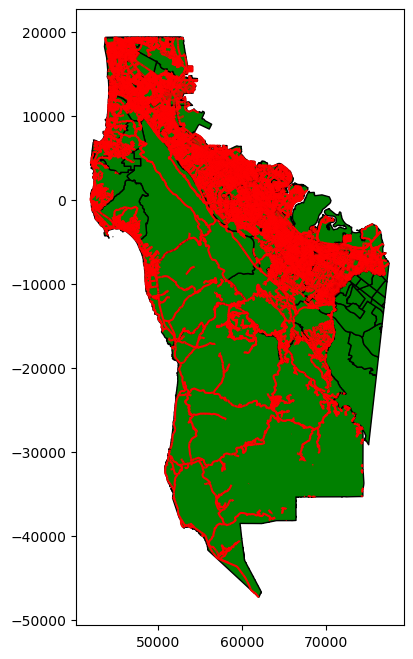

In [64]:
fig, ax = plt.subplots(figsize = (8,8)) 
census_track2_sf.plot(ax=ax,color="green",edgecolor='k')
sf_lts.geometry.plot(color="red",edgecolor='k',ax=ax)

In [60]:
input_census_tract=census_track2_sf.reset_index()
input_census_tract.shape

(206, 18)

In [61]:
def grid_connectivity_score (input_census_tract,sf_motor_network,sf_bike_network):
    
    connectivity_score=[]

    for index, row in input_census_tract.iterrows():
        network_motor=gpd.clip(sf_motor_network,row['geometry'])
        sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
        sf_lts_motor_g1 =momepy.gdf_to_nx(sf_lts_motor_g, approach='primal')
        #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
        motor_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_motor_g1,cutoff=None, weight='impedance_of_link'))
        # Convert the shorsted path distance distionary to dataframe
        sf_shortest_path_motor_length=pd.DataFrame.from_dict(motor_length)
        # Calculate the total motor path
        sf_shortest_path_motor_length['total']=sf_shortest_path_motor_length.sum(numeric_only=True, axis=0)
        sf_shortest_path_motor_length_sum=sf_shortest_path_motor_length['total'].sum()



        network_bike=gpd.clip(sf_bike_network,row['geometry'])
        sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
        sf_lts_bike_g1 =momepy.gdf_to_nx(sf_lts_bike_g, approach='primal')
        #https://www.programcreek.com/python/example/120188/networkx.all_pairs_dijkstra_path_length
        bike_length = dict(nx.all_pairs_dijkstra_path_length(sf_lts_bike_g1,cutoff=None, weight='impedance_of_link'))
        # Convert the shorsted path distance distionary to dataframe
        sf_shortest_path_bike_length=pd.DataFrame.from_dict(bike_length)
        # Calculate the total motor path
        sf_shortest_path_bike_length['total']=sf_shortest_path_bike_length.sum(numeric_only=True, axis=0)
        sf_shortest_path_bike_length_sum=sf_shortest_path_bike_length['total'].sum()

        #connectivity score
        sf_network_connectivity_score=sf_shortest_path_bike_length_sum/sf_shortest_path_motor_length_sum
        connectivity_score.append((sf_shortest_path_motor_length_sum,sf_shortest_path_bike_length_sum, sf_network_connectivity_score))

    cols=['motor_path_weighted_length','bike_path_weighted_length','Connectivity score']
    result = pd.DataFrame(connectivity_score, columns=cols)
    return result


In [67]:
SF_CS=grid_connectivity_score (input_census_tract,sf_motor_network,sf_bike_network)
SF_CS.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:31: RuntimeWarning: invalid value encountered in double_scalars
  sf_network_connectivity_score=sf_shortest_path_bike_length_sum/sf_shortest_path_motor_length_sum
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_16188\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd

,motor_path_weighted_length,bike_path_weighted_length,Connectivity score
0,34866.354302,0.000000,0.000000
1,171501.153487,22186.322466,0.129365
2,0.000000,0.000000,NaN
3,0.000000,0.000000,NaN
4,0.000000,0.000000,NaN


In [68]:
# Now jointhe connectivity score with census track and save it

In [69]:
cs_census_track=pd.merge(SF_CS, input_census_tract, left_index=True, right_index=True)
cs_census_track.head()

,motor_path_weighted_length,bike_path_weighted_length,Connectivity score,index,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,...,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,34866.354302,0.000000,0.000000,1562,G0600870120500,06,087,120500,06087120500,1205,...,G5020,S,146057929.0,28806.0,+37.1638931,-122.0937661,104336.061208,31455.510841,3.491466e+05,"MULTIPOLYGON (((72399.991 -35313.357, 72382.84..."
1,171501.153487,22186.322466,0.129365,1489,G0600850511707,06,085,511707,06085511707,5117.07,...,G5020,S,112950381.0,372433.0,+37.2923684,-122.1192678,86843.852915,86724.167064,1.131878e+08,"POLYGON ((72891.586 -15708.469, 72779.152 -163..."
2,0.000000,0.000000,NaN,1487,G0600850511704,06,085,511704,06085511704,5117.04,...,G5020,S,15393823.0,0.0,+37.3610552,-122.1406585,25018.205336,25018.205336,1.539382e+07,"POLYGON ((74250.074 -16319.958, 74285.209 -163..."
3,0.000000,0.000000,NaN,1485,G0600850511701,06,085,511701,06085511701,5117.01,...,G5020,S,9190789.0,0.0,+37.3782599,-122.1319059,17768.961719,17768.961719,9.190793e+06,"POLYGON ((76638.848 -15031.649, 76626.841 -150..."
4,0.000000,0.000000,NaN,1468,G0600850510500,06,085,510500,06085510500,5105,...,G5020,S,2613476.0,0.0,+37.3927552,-122.1201614,8271.419179,8271.419179,2.613474e+06,"POLYGON ((76562.645 -15715.705, 76546.897 -157..."


<AxesSubplot:>

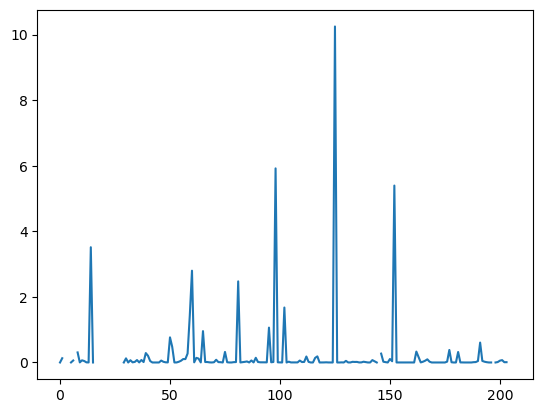

In [70]:
cs_census_track['Connectivity score'].plot()

In [71]:
cs_census_track['Connectivity score'].median()

0.008546720629128965

In [360]:
crs = {'init': 'epsg:7131'}
gdf = gpd.GeoDataFrame(cs_census_track, crs=crs, geometry = 'geometry')
gdf.to_file("H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/San_Mateo_Census_track_level_B_vs_Motor_CS.shp")

# LMN Algorithm

In [62]:
# Split the network as low stress network to get the connectivity 
sf_motor_network_op2=sf_motor_network
sf_bike_network_op2=sf_lts.loc[sf_lts['FT_SEG_STR']<3]

In [63]:
%%time
# low stress connectivity
low_stress_network_score=graph_parameter(sf_bike_network_op2,7031,convex_hull_area1,sf_area)
low_stress_network_score['mode']='low_stress'
low_stress_network_score

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4031221608.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)


CPU times: total: 3.36 s
Wall time: 3.36 s


,Number of Intersection,street_segment_count,Number of Node,Number of subnetwork,Street_density,Intersection_density,Street_density_by_land_area,Intersection_density_by_land_area,CNR,alpha,beta,gamma,eta,GTP,cyclomatic_Number,Aggregate_TP_score,mode
0,10107,31977,29406,1244,3.115595,2.488090e-12,[[4.139032405567839]],[[22.172995079413983]],0.589742,0.064873,1.087431,0.362485,94.952857,0.131262,2572,2573.51479,low_stress


In [64]:
# high stress (motor network) connectivity
high_stress_network_score=graph_parameter(sf_motor_network_op2,4811,convex_hull_area1,sf_area)
high_stress_network_score['mode']='high_stress'
high_stress_network_score

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4031221608.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)


,Number of Intersection,street_segment_count,Number of Node,Number of subnetwork,Street_density,Intersection_density,Street_density_by_land_area,Intersection_density_by_land_area,CNR,alpha,beta,gamma,eta,GTP,cyclomatic_Number,Aggregate_TP_score,mode
0,11968,38447,33308,495,3.468836,2.946222e-12,[[4.608308918890403]],[[26.255704473179634]],0.713273,0.084581,1.154287,0.38477,87.927768,0.171018,5140,5141.623638,high_stress


In [65]:
# low Vs High stress connectivity score
low_high_stress_CS=sf_connectivity_score (sf_motor_network_op2,sf_bike_network_op2)
low_high_stress_CS

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\2561783953.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(sf_motor_network)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\2561783953.py:14: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(sf_bike_network)


,motor_path_weighted_length,bike_path_weighted_length,Connectivity score
0,3.238828e+13,1.509612e+12,0.04661


In [66]:
# Calculate the census level stress for high vs low stress network
SF_CS_hl=grid_connectivity_score (input_census_tract,sf_bike_network_op2,sf_motor_network_op2)
SF_CS_hl.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  sf_network_connectivity_score=sf_shortest_path_bike_length_sum/sf_shortest_path_motor_length_sum
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: C

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:31: RuntimeWarning: invalid value encountered in double_scalars
  sf_network_connectivity_score=sf_shortest_path_bike_length_sum/sf_shortest_path_motor_length_sum
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Cu

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:31: RuntimeWarning: invalid value encountered in double_scalars
  sf_network_connectivity_score=sf_shortest_path_bike_length_sum/sf_shortest_path_motor_length_sum
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: C

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.Ge

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.GeoDataFrame.explode(network_bike)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:7: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_motor_g=gpd.GeoDataFrame.explode(network_motor)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\4171608999.py:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  sf_lts_bike_g=gpd.Ge

,motor_path_weighted_length,bike_path_weighted_length,Connectivity score
0,0.000000,34866.354302,inf
1,26454.131336,171501.153487,6.482963
2,0.000000,0.000000,NaN
3,0.000000,0.000000,NaN
4,0.000000,0.000000,NaN


In [67]:
SF_CS_hl['Connectivity score'].median()

2.52308309833406

In [68]:
cs_census_track_hl=pd.merge(SF_CS_hl, input_census_tract, left_index=True, right_index=True)
crs = {'init': 'epsg:7131'}
gdf_hl = gpd.GeoDataFrame(cs_census_track_hl, crs=crs, geometry = 'geometry')
gdf_hl.to_file("H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Alameda_Census_track_level_CS_hl.shp")

C:\Users\mmmiah\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_7744\2246915493.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_hl.to_file("H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/Bay Area_LTS/Alameda_Census_track_level_CS_hl.shp")


   # end of the code